# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + '087372476300c9ce69ad7bbf44b8f877' + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 2 of Set 1 | margaret river
Processing Record 3 of Set 1 | qarqaraly
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | aasiaat
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | neyshabur
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | smithers
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | hamilton
Processing Record 17 of Set 1 | warmbad
Processing Record 18 of Set 1 | usinsk
Processing Record 19 of Set 1 | fort bragg
Processing Record 20 of Set 1 | capayan
Processing Record 21 of Set 1

In [5]:
city_url

'http://api.openweathermap.org/data/2.5/weather?appid=087372476300c9ce69ad7bbf44b8f877&q=kone&units=metric'

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,23.77,51,0,7.15,AU,1707708077
1,qarqaraly,49.4058,75.4742,-22.71,99,86,3.62,KZ,1707708078
2,yellowknife,62.4560,-114.3525,-13.10,98,40,3.09,CA,1707708079
3,waitangi,-43.9535,-176.5597,15.46,76,90,1.34,NZ,1707708080
4,port-aux-francais,-49.3500,70.2167,6.05,72,7,9.67,TF,1707708080


In [8]:
#Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
#Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,23.77,51,0,7.15,AU,1707708077
1,qarqaraly,49.4058,75.4742,-22.71,99,86,3.62,KZ,1707708078
2,yellowknife,62.4560,-114.3525,-13.10,98,40,3.09,CA,1707708079
3,waitangi,-43.9535,-176.5597,15.46,76,90,1.34,NZ,1707708080
4,port-aux-francais,-49.3500,70.2167,6.05,72,7,9.67,TF,1707708080


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

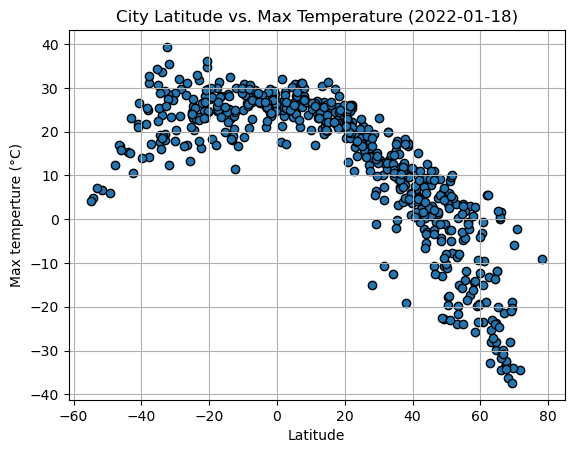

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max temperture (°C)')
plt.title('City Latitude vs. Max Temperature (2022-01-18)')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

#### Latitude Vs. Humidity

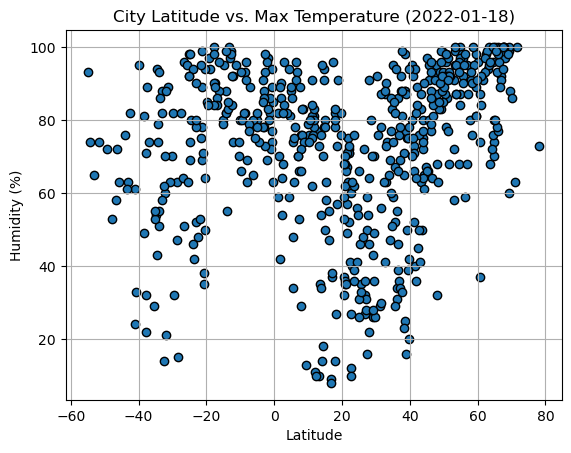

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o',edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Max Temperature (2022-01-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

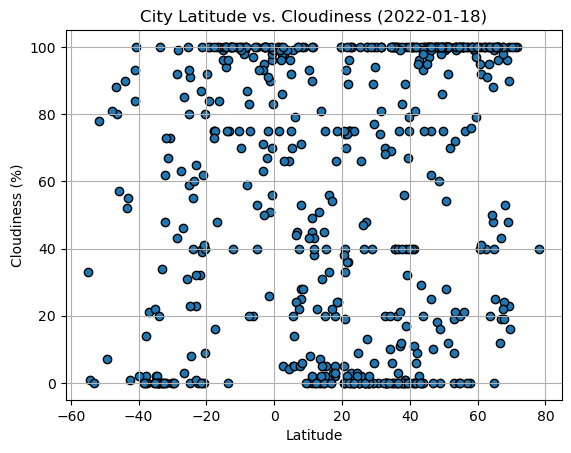

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o',edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022-01-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

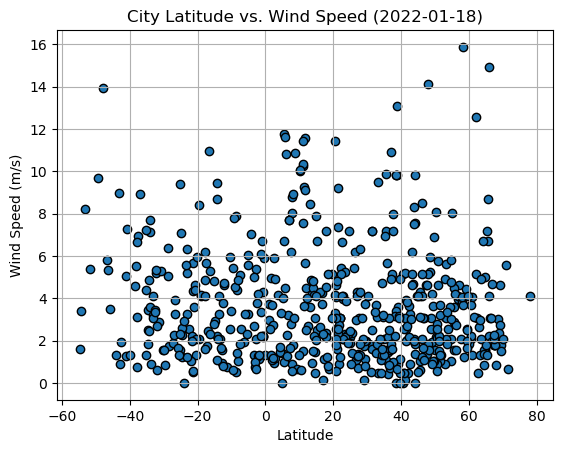

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o',edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-01-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linregress(x_values,y_values,equation_x_coor,equation_y_coor):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    equation = f'y={slope.round(2)}x + {intercept.round(2)}'
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(equation,(equation_x_coor,equation_y_coor),c='red',fontsize=15)

    print(f'The r-value is: {rvalue}')

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,qarqaraly,49.4058,75.4742,-22.71,99,86,3.62,KZ,1707708078
2,yellowknife,62.4560,-114.3525,-13.10,98,40,3.09,CA,1707708079
5,aasiaat,68.7098,-52.8699,-27.98,99,96,3.04,GL,1707708081
7,neyshabur,36.2133,58.7958,7.43,31,0,0.42,IR,1707708082
8,bilibino,68.0546,166.4372,-36.17,97,53,0.85,RU,1707708083


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,23.77,51,0,7.15,AU,1707708077
3,waitangi,-43.9535,-176.5597,15.46,76,90,1.34,NZ,1707708080
4,port-aux-francais,-49.3500,70.2167,6.05,72,7,9.67,TF,1707708080
6,adamstown,-25.0660,-130.1015,24.48,92,59,9.42,PN,1707708082
11,grytviken,-54.2811,-36.5092,4.84,74,1,3.38,GS,1707708085


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.885851014817981


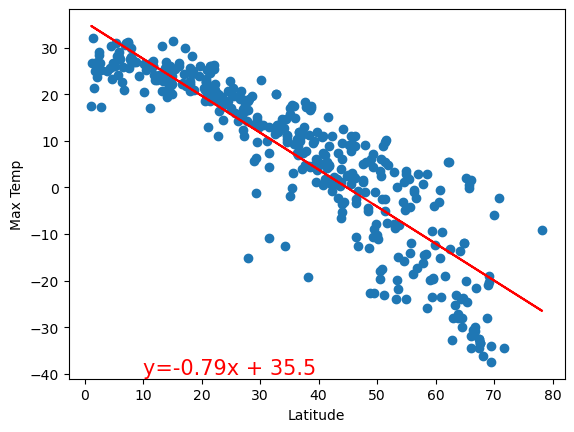

In [17]:
# Linear regression on Northern Hemisphere
plot_linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],10,-40)
plt.xlabel('Latitude')
plt.ylabel('Max Temp');

The r-value is: 0.4485175708073972


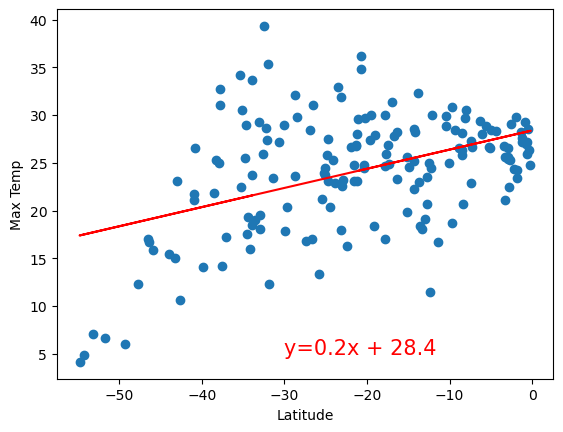

In [18]:
# Linear regression on Southern Hemisphere
plot_linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],-30,5)
plt.xlabel('Latitude')
plt.ylabel('Max Temp');

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.40758226715928836


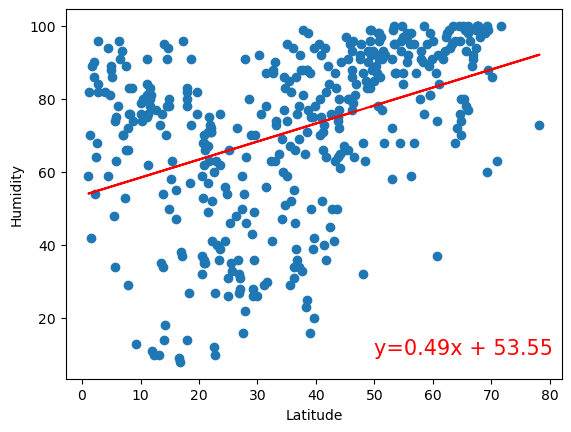

In [19]:
# Northern Hemisphere
plot_linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],50,10)
plt.xlabel('Latitude')
plt.ylabel('Humidity');

The r-value is: 0.38547092112701187


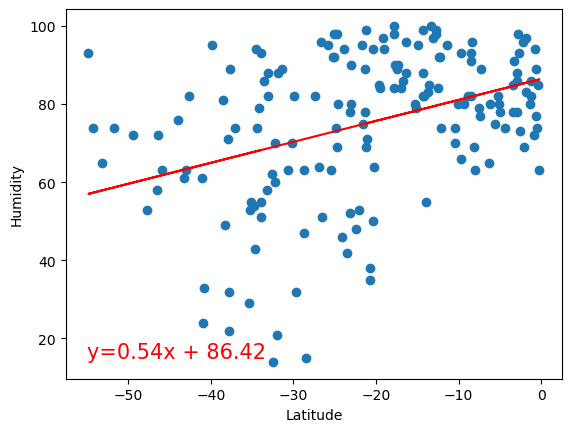

In [20]:
# Southern Hemisphere
plot_linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],-55,15)
plt.xlabel('Latitude')
plt.ylabel('Humidity');

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.27538761104781984


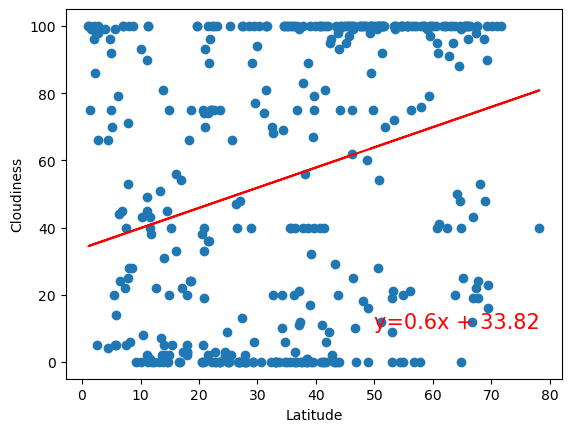

In [21]:
# Northern Hemisphere
plot_linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],50,10)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness');

The r-value is: 0.5059774238441507


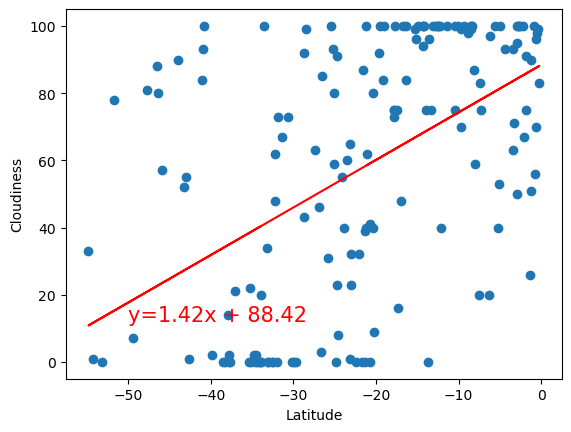

In [22]:
# Southern Hemisphere
plot_linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],-50,12)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness');

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.10063860496441139


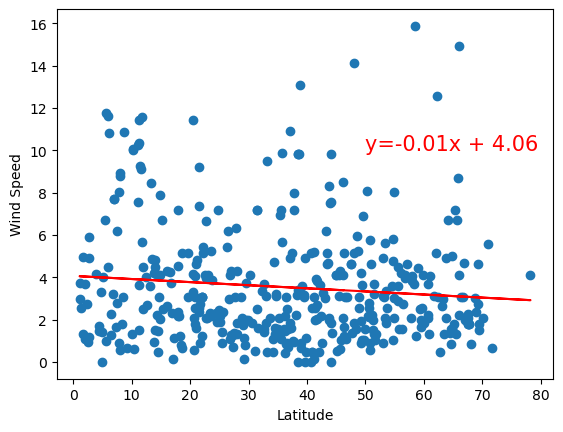

In [23]:
# Northern Hemisphere
plot_linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],50,10)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed');

The r-value is: -0.18388304907312492


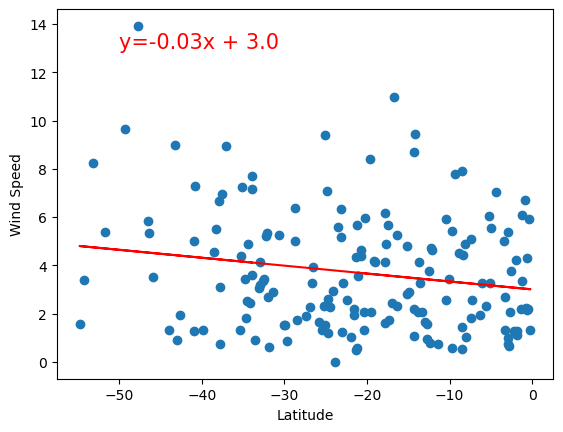

In [24]:
# Southern Hemisphere
plot_linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],-50,13)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed');

**Discussion about the linear relationship:** YOUR RESPONSE HERE

northern:  
lat vs maxtemp: rvalue= -0.89  
lat vs humidity: rvalue= 0.43  
lat vs cloudiness: rvalue= 0.38  
lat vs windspeed: rvalue= -0.08  
southern:  
lat vs maxtemp: rvalue= 0.63  
lat vs humidity: rvalue= 0.12  
lat vs cloudiness: rvalue= 0.34  
lat vs windspeed: rvalue= -0.11  

From the linear relationships of the graphs, it can be seen that there is a strong negative relationship (rvalue of -0.89) between the latitude and max temperature in the northern hemispher, meaning that as the latitdue increases further away from 0 degree, the max temperature will decrease. 
This is reflected similarly in the southern hemispher where a moderate positive relationship (rvalue of 0.63) is showcased, meaning that the temperature will increase as the latitude increases closer to 0 degree from a negative latitude. 

Looking at the humidity of both hemisphere, the northern hemisphere (rvalue of 0.43) is indicating a moderate positive relationship between the latitude and the humidity, meaning the humidity would increase as the latitude increase further away from 0 degree. However, this relationship is much less weaker (rvalue of 0.12) indicating that there is minimal to no influence between the humidity and latitude in the southern hemisphere. 

Lastly, considering the comparison of the cloudiness and windspeed with the latitude, they both have a similar low rvalue in both northern and southern hemisphere, indicating there is a weak relationship between each variables thus holds no or unecessary analytic value. 